# Analysis of a Wingate test

<b>Protocol ergometer:</b>
isokinetic mode, velocity = 0

<b>Description of the isometric force test: </b>
Participants are asked to deliver 3 times 5s force on the handrim in the tangential direction, while remaining in upright position

<b>Outcome: </b>
Maximal isometric force

First, let us import the right package(s) and define the data file

In [1]:
import worklab as wl
import os

filename = os.getcwd()
filename = os.path.join('r',filename, 'example_data', 'Isometric force_example.xls')

C:\Users\Janssen\PycharmProjects\worklab\docs\chapters\examples\example_data\Isometric force_example.xls


Import and process data ergometer:

In [2]:
wheelchair = wl.com.load_wheelchair(filename)
data = wl.com.load_esseda(filename)
data = wl.kin.filter_ergo(data)
data = wl.kin.process_ergo(data, wheelsize=wheelchair['wheelsize'], rimsize=wheelchair['rimsize'])
data['mean'] = (data['left'] + data['right'])/2

After this, we can visualize the Isometric force test and calculate the outcome parameters:

         left       right        mean
0  151.424847  153.166177  152.275117
1  134.882801  148.467653  141.644269
2  141.432065  141.019401  141.224888


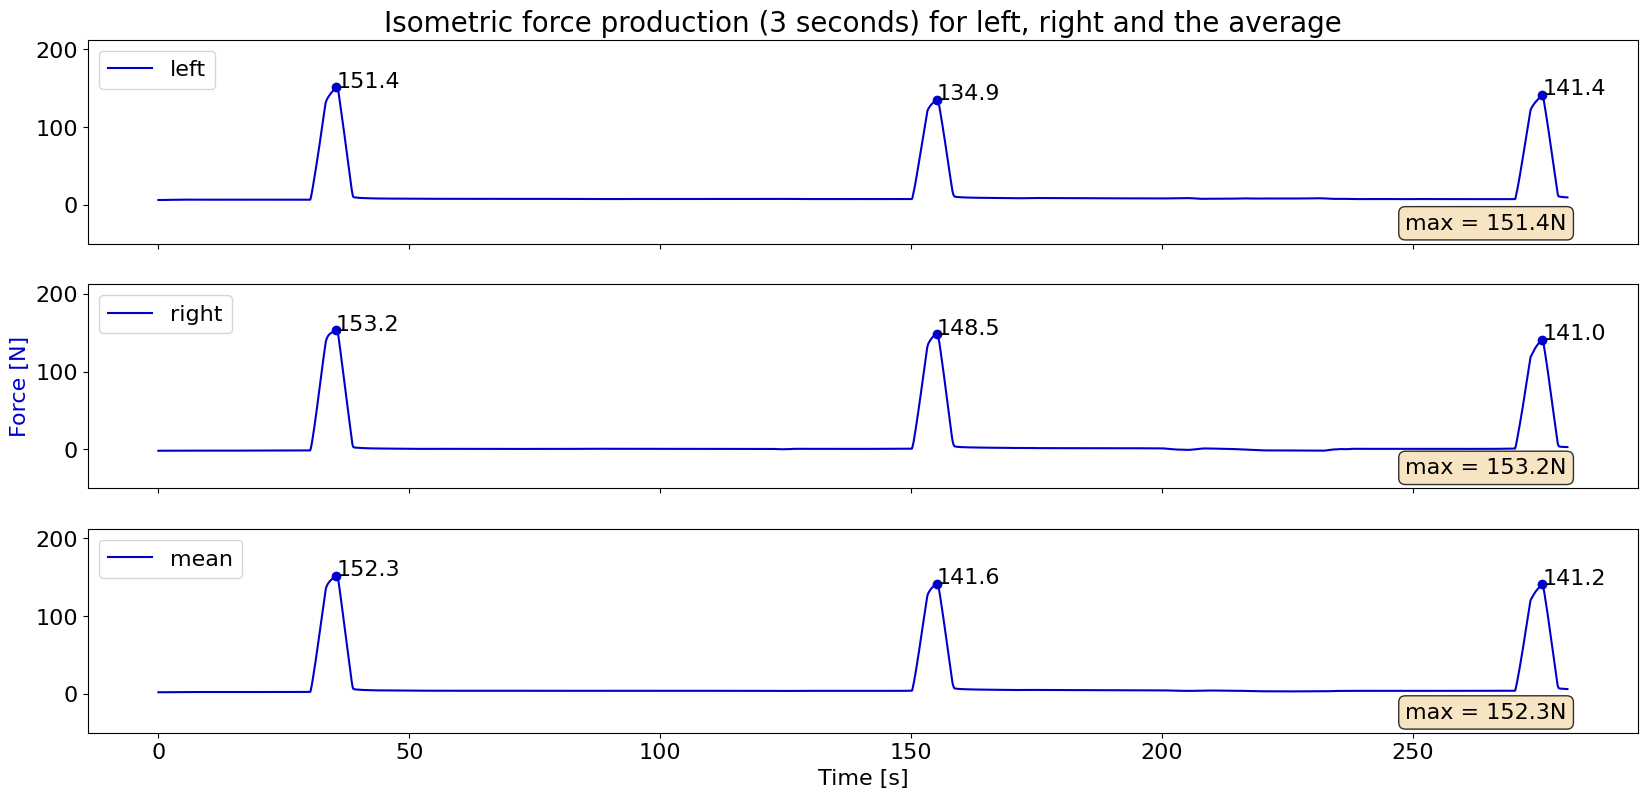

In [3]:
fig_isometric, outcomes = wl.ana.isometricforce(data)
print(outcomes)

Now we have the performance on the Isometric force test! If you want to calculate the corresponding Wingate resistance for this participant you can do that with the following lines

In [4]:
muser = 65  # kg, mass user
fiso = outcomes['mean'].max()
wl.ana.protocol_wingate(fiso, muser, wheelchair['weight'])

------------------------------------------------------------
 The maximal three second force is: 152.28 N
 The predicted P30 = 65.96
 Aimed is for an average velocity of 2 m/s
 The calculated resistance for the Wingate test is: 0.045 mu
------------------------------------------------------------
